# Graficas para resultados tesis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_graf = pd.read_csv('dfpre2_filtrado.csv')
df_graf.drop(columns=['ID de respuesta'], inplace=True)
print(df_graf)

     Edad en años (solo números sin espacio) Sexo biológico  \
0                                       34.0         Hombre   
1                                       20.0         Hombre   
2                                       19.0         Hombre   
3                                       20.0          Mujer   
4                                       19.0         Hombre   
..                                       ...            ...   
660                                     20.0          Mujer   
661                                     21.0          Mujer   
662                                     19.0          Mujer   
663                                     25.0         Hombre   
664                                     18.0          Mujer   

         Programa académico Semestre más avanzado que estás cursando  \
0     Ingeniería Industrial                                      10°   
1    Ingeniería de Sistemas                                       5°   
2    Ingeniería de Sistemas

In [3]:
#Creación del objeto para la conversión de escala a número.

conv_like ={
    'Totalmente en desacuerdo': 1,
    'Totalmente en desacuerdo\t': 1,
    'Totalmente en desacuerdo\t	': 1,
    'En desacuerdo': 2,
    'En desacuerdo\t': 2,
    'En desacuerdo\t	': 2,
    'Ni de acuerdo, ni en desacuerdo': 3,
    'De acuerdo': 4,
    'De acuerdo\t': 4,
    'De acuerdo\t	': 4,
    'Totalmente de acuerdo': 5
}

#Creación de lista para seleccionar las columnas a convertir.
colum_trans = df_graf.columns[7:71]

#Una vez que comprobé los valores con punto flotante los pasaré a tipo entero.
for col in df_graf.columns[71:74]:
    df_graf[col] = df_graf[col].astype(int)
#Prueba conversión Columnas de escala Likert
df_graf[colum_trans] = df_graf[colum_trans].replace(conv_like)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\4072234643.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_graf[colum_trans] = df_graf[colum_trans].replace(conv_like)


In [4]:
#Colocar nombres más cortos a las variables para que no queden como las
#Preguntas originales de la encuesta

nue_nom_var = [
    "EDAD", "SEXO", "PROGRAMA", "SEMESTRE", "BECA", "TUTORAM", "TUTORH", "AUTOEFICACIA_1",
    "AUTOEFICACIA_2", "AUTOEFICACIA_3", "AUTOEFICACIA_4", "AUTOREGU_1",
    "AUTOREGU_2", "AUTOREGU_3", "AUTOREGU_4", "AUTOREGU_5", "AUTOREGU_6",
    "INTR_1", "INTR_2", "INTR_3", "INTR_4", "EXTR_1", "EXTR_2", "EXTR_3",
    "EXTR_4", "AUTOEFICACIA_5", "AUTOEFICACIA_6", "AUTOEFICACIA_7",
    "AUTOEFICACIA_8", "AUTOEFICACIA_9", "PERTPRO_1", "PERTPRO_2", "PERTPRO_3",
    "PERTPRO_4", "PERTPRO_5", "PERTPRO_6", "PERTPRO_7", "PERTPRO_8",
    "PERTSTEM_1", "PERTSTEM_2", "PERTSTEM_3", "PERTSTEM_4", "COMPROMISO_1",
    "COMPROMISO_2", "COMPROMISO_3", "COMPROMISO_4", "COMPROMISO_5",
    "EXPEMPLEO_1", "EXPEMPLEO_2", "EXPEMPLEO_3", "EXPEMPLEO_4", "EXPEXITO_1",
    "EXPEXITO_2", "EXPEXITO_3", "EXPEXITO_4", "EXPEXITO_5", "EXPEXITO_6",
    "EXPEXITO_7", "EXPVALPER_1", "EXPVALPER_2", "EXPVALPER_3", "EXPVALPER_4",
    "EXPVALPER_5", "EXPVALPER_6", "EXPVALPER_7", "EXPVALPER_8", "ABANDON_1",
    "ABANDON_2", "ABANDON_3", "ABANDON_4", "ABANDON_5", "CGENPROG",
    "CESTPROG", "CGENSTE"
]

df_graf.columns = nue_nom_var

#CLASIFICACIÓN DE COLUMNAS POR CONSTRUCTO

#CREACIÓN DE OBJETOS QUE AGRUPEN LAS COLUMNAS DE CADA CONSTRUCTO 
#"""{1.AUTOEFICACIA, 2.AUTORREGULACION, 3.MOTIVACION INTRINSECA, #4.MOTIVACION EXTRINSECA, 5.SENTIDO DE PERTENENCIA AL PROGRAMA,
#6.SENTIDO DE PERTENENCIA A STEM, 7.COMPROMISO ACADÉMICO#,8.EXPECTATIVAS DE EMPLEO, 9.EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM,
#10.EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM,#11.INTENCIÓN DE ABANDONAR,12.COMPATIBILIDAD GENERO-PROGRAMA,
#13.COMPATIBILIDAD ESTUDIANTE-STEM,14.COMPATIBILIDAD GENERO-STEM}"""
# 1. AUTOEFICACIA
autoeficacia_cols = ['AUTOEFICACIA_1', 'AUTOEFICACIA_2', 'AUTOEFICACIA_3', 'AUTOEFICACIA_4',
                     'AUTOEFICACIA_5', 'AUTOEFICACIA_6', 'AUTOEFICACIA_7', 'AUTOEFICACIA_8',
                     'AUTOEFICACIA_9']
# 2. AUTORREGULACION
autorregu_cols = ['AUTOREGU_1', 'AUTOREGU_2', 'AUTOREGU_3', 'AUTOREGU_4', 'AUTOREGU_5', 'AUTOREGU_6']

# 3. MOTIVACION INTRINSECA
motivintrinseca_cols = ['INTR_1', 'INTR_2', 'INTR_3', 'INTR_4']

# 4. MOTIVACION EXTRINSECA
motivoextrinseca_cols = ['EXTR_1', 'EXTR_2', 'EXTR_3', 'EXTR_4']

# 5. SENTIDO DE PERTENENCIA AL PROGRAMA
pertprograma_cols = ['PERTPRO_1', 'PERTPRO_2', 'PERTPRO_3', 'PERTPRO_4', 'PERTPRO_5', 'PERTPRO_6', 'PERTPRO_7', 'PERTPRO_8']

# 6. SENTIDO DE PERTENENCIA A STEM
pertstem_cols = ['PERTSTEM_1', 'PERTSTEM_2', 'PERTSTEM_3', 'PERTSTEM_4']

# 7. COMPROMISO ACADÉMICO
compracad_cols = ['COMPROMISO_1', 'COMPROMISO_2', 'COMPROMISO_3', 'COMPROMISO_4', 'COMPROMISO_5']

# 8. EXPECTATIVAS DE EMPLEO
expempleo_cols = ['EXPEMPLEO_1', 'EXPEMPLEO_2', 'EXPEMPLEO_3', 'EXPEMPLEO_4']

# 9. EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM
expvalexit_cols = ['EXPEXITO_1', 'EXPEXITO_2', 'EXPEXITO_3', 'EXPEXITO_4', 'EXPEXITO_5', 'EXPEXITO_6', 'EXPEXITO_7']

# 10. EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM
expvalper_cols = ['EXPVALPER_1', 'EXPVALPER_2', 'EXPVALPER_3', 'EXPVALPER_4', 'EXPVALPER_5', 'EXPVALPER_6', 'EXPVALPER_7', 'EXPVALPER_8']

# 11. INTENCIÓN DE ABANDONAR
abandona_cols = ['ABANDON_1', 'ABANDON_2', 'ABANDON_3', 'ABANDON_4', 'ABANDON_5']

# 12. COMPATIBILIDAD GENERO-PROGRAMA
compatgenprog_cols = ['CGENPROG']

# 13. COMPATIBILIDAD ESTUDIANTE-STEM
compatestud_cols = ['CESTPROG']

# 14. COMPATIBILIDAD GENERO-STEM
compatgen_cols = ['CGENSTE']

#Paso 1 Asignación de grupos de variables a los constructos que se resumirán

df_grafica2 = df_graf.copy()

constructos = {
    'autoeficacia': autoeficacia_cols,
    'auto_regulacion': autorregu_cols,
    'motivacion_intrinseca': motivintrinseca_cols,
    'motivacion_extrinseca': motivoextrinseca_cols,
    'pertenencia_programa': pertprograma_cols,
    'pertenencia_stem': pertstem_cols,
    'compromiso_academico': compracad_cols,
    'expec_empleo': expempleo_cols,
    'expec_valor_exit': expvalexit_cols,
    'expec_val_percibido': expvalper_cols,
    'abandona': abandona_cols,
    'compatibilidad_genpro': compatgenprog_cols,
    'compatibilidad_estste': compatestud_cols,
    'compatibilidad_genste': compatgen_cols
}

#Paso 2, todavía creando las columnas de promedio por constructo

for nombre, cols in constructos.items():
    df_grafica2[f'media_{nombre}'] = df_grafica2[cols].mean(axis=1)

#Paso 3, preparar el dataframe para graficar

col_media = [f'media_{nombre}' for nombre in constructos]
col_incluir = ["EDAD", "SEXO", "PROGRAMA", "SEMESTRE", "BECA", "TUTORAM", "TUTORH"]

df_grafica3 = df_grafica2[col_incluir + col_media].copy()

# Gráficas para las variables del estudio.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1028049120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_grafica3, x='SEXO', palette='Set1')


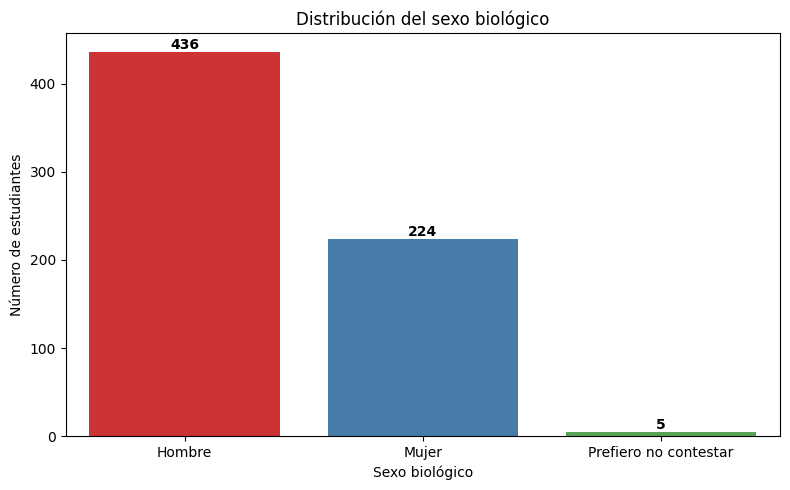

In [6]:
#1 Distribución de Género

# Crear la figura y el gráfico
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_grafica3, x='SEXO', palette='Set1')

# Agregar etiquetas de conteo sobre cada barra
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustar títulos y etiquetas
plt.title('Distribución del sexo biológico')
plt.ylabel('Número de estudiantes')
plt.xlabel('Sexo biológico')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1932657367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='SEXO', y='EDAD', palette='Set1')


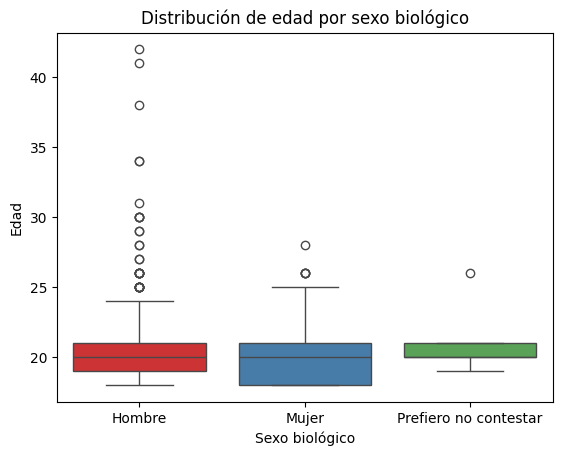

In [7]:
#Edad por género
sns.boxplot(data=df_grafica3, x='SEXO', y='EDAD', palette='Set1')
plt.title('Distribución de edad por sexo biológico')
plt.xlabel('Sexo biológico')
plt.ylabel('Edad')
plt.show()

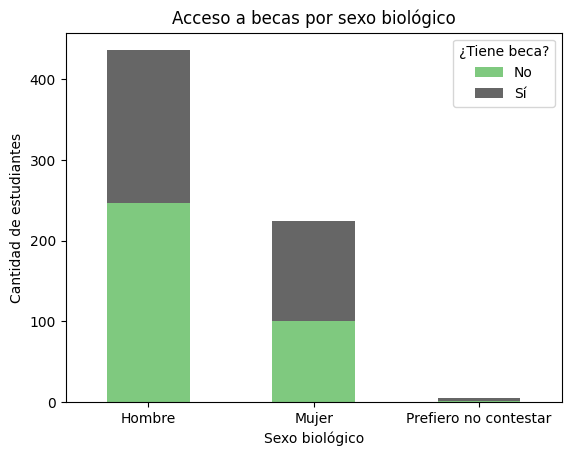

In [8]:
# Tipo de Beca

beca_counts = pd.crosstab(df_grafica3['SEXO'], df_grafica3['BECA'])
beca_counts.plot(kind='bar', stacked=True, colormap='Accent')
plt.xticks(rotation=0)
plt.title('Acceso a becas por sexo biológico')
plt.xlabel('Sexo biológico')
plt.ylabel('Cantidad de estudiantes')
plt.legend(title='¿Tiene beca?')
plt.show()

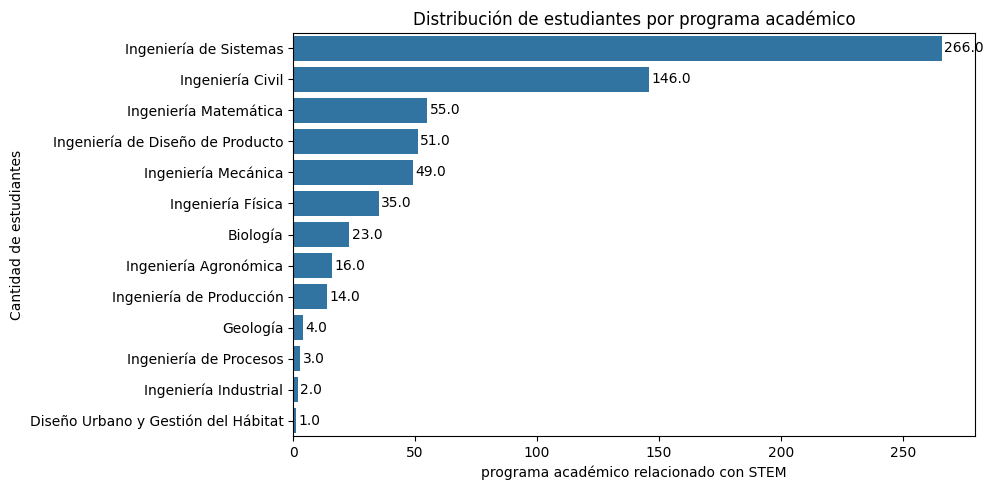

In [9]:
# Contar y ordenar las categorías
orden = df_grafica3['PROGRAMA'].value_counts().sort_values(ascending=False).index

# Gráfico horizontal ordenado
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_grafica3,
    y='PROGRAMA',
    order=orden
)

# Etiquetas sobre las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width + 1, p.get_y() + p.get_height() / 2),
                va='center')

# Estética
plt.title("Distribución de estudiantes por programa académico")
plt.xlabel("programa académico relacionado con STEM")
plt.ylabel("Cantidad de estudiantes")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\671697402.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(datos.index, rotation=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\671697402.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(datos.index, rotation=0)


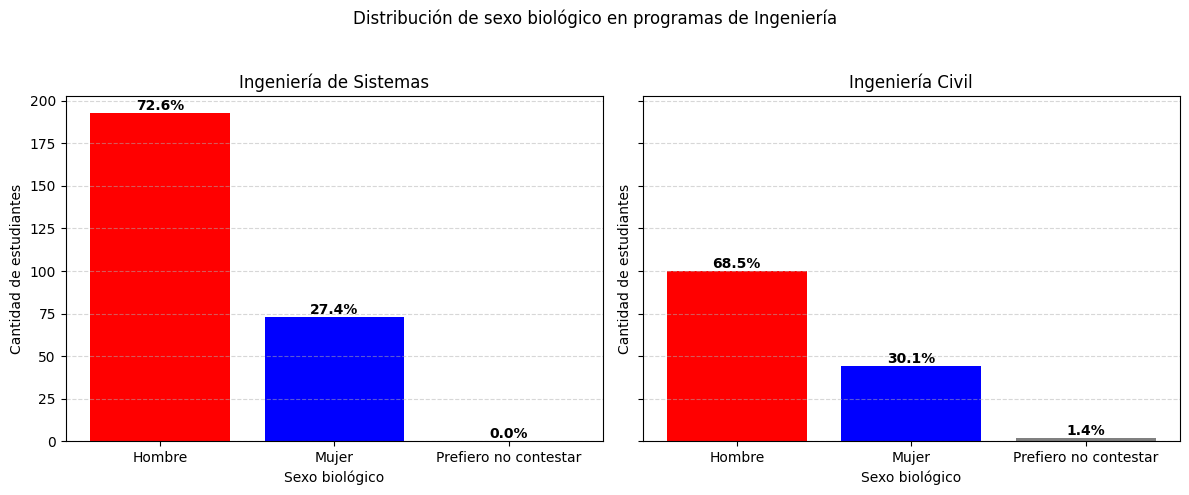

In [11]:
# Filtrar el DataFrame por los programas de interés
df_filtrado = df_grafica3[df_grafica3['PROGRAMA'].isin(['Ingeniería de Sistemas', 'Ingeniería Civil'])]

# Crear la figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Programas a graficar y colores
programas = ['Ingeniería de Sistemas', 'Ingeniería Civil']
colores = ['red', 'blue', 'gray']

for i, programa in enumerate(programas):
    datos = df_filtrado[df_filtrado['PROGRAMA'] == programa]['SEXO'].value_counts()
    datos = datos.reindex(['Hombre', 'Mujer', 'Prefiero no contestar'], fill_value=0)  # orden consistente
    
    total = datos.sum()
    porcentajes = (datos / total * 100).round(1)
    
    bars = axes[i].bar(datos.index, datos.values, color=colores)

    axes[i].set_title(programa)
    axes[i].set_xlabel('Sexo biológico')
    axes[i].set_xticklabels(datos.index, rotation=0)
    axes[i].set_ylabel('Cantidad de estudiantes')
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)

    # Agregar etiquetas de porcentaje dentro o encima de las barras
    for bar, pct in zip(bars, porcentajes):
        height = bar.get_height()
        axes[i].annotate(f'{pct}%',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Distribución de sexo biológico en programas de Ingeniería')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

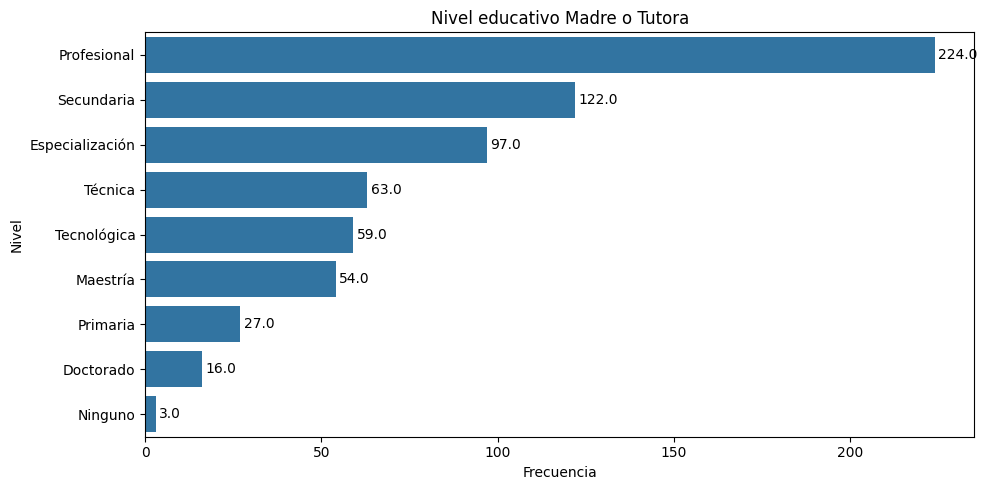

In [12]:
# Contar y ordenar las categorías
orden = df_grafica3['TUTORAM'].value_counts().sort_values(ascending=False).index

# Gráfico horizontal ordenado
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_grafica3,
    y='TUTORAM',
    order=orden
)

# Etiquetas sobre las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width + 1, p.get_y() + p.get_height() / 2),
                va='center')

# Estética
plt.title("Nivel educativo Madre o Tutora")
plt.xlabel("Frecuencia")
plt.ylabel("Nivel")
plt.tight_layout()
plt.show()

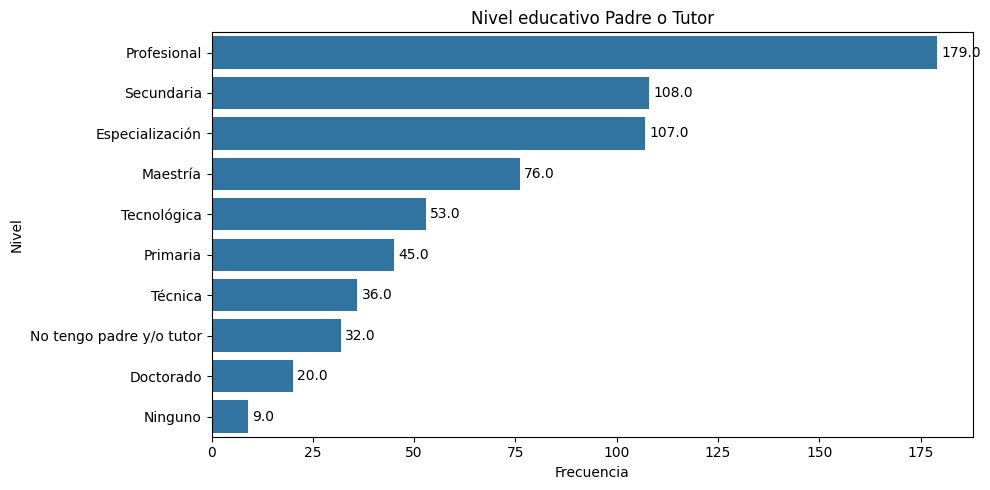

In [13]:
# Contar y ordenar las categorías
orden = df_grafica3['TUTORH'].value_counts().sort_values(ascending=False).index

# Gráfico horizontal ordenado
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_grafica3,
    y='TUTORH',
    order=orden
)

# Etiquetas sobre las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width + 1, p.get_y() + p.get_height() / 2),
                va='center')

# Estética
plt.title("Nivel educativo Padre o Tutor")
plt.xlabel("Frecuencia")
plt.ylabel("Nivel")
plt.tight_layout()
plt.show()

# Gráficas Boxplot comparación H/M por constructo

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\561467201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, y='SEXO', x='media_autoeficacia', palette='Set1')


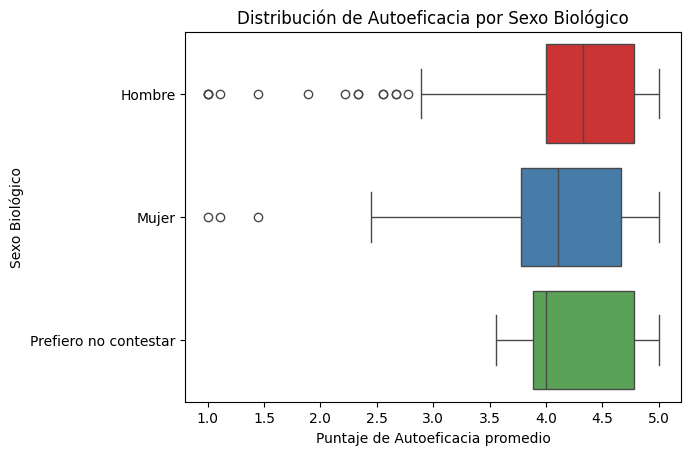

In [14]:
# 'autoeficacia_1' 
sns.boxplot(data=df_grafica3, y='SEXO', x='media_autoeficacia', palette='Set1')
plt.title('Distribución de Autoeficacia por Sexo Biológico')
plt.xlabel('Puntaje de Autoeficacia promedio')
plt.ylabel('Sexo Biológico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1854924854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_auto_regulacion', y='SEXO', palette='Set1')


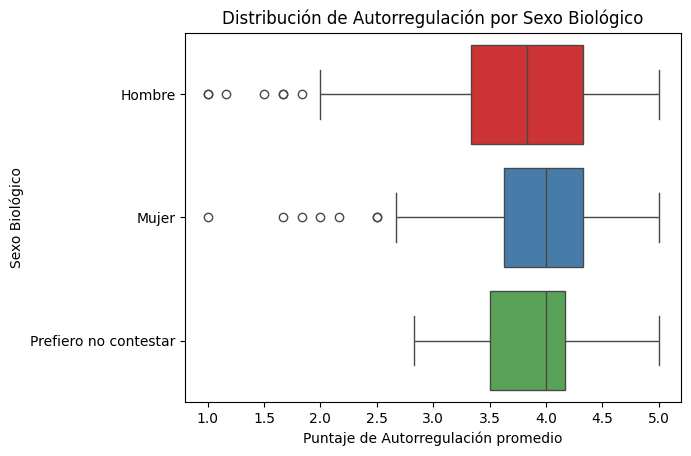

In [15]:
# 'autorregulación_2' 
sns.boxplot(data=df_grafica3, x='media_auto_regulacion', y='SEXO', palette='Set1')
plt.title('Distribución de Autorregulación por Sexo Biológico')
plt.xlabel('Puntaje de Autorregulación promedio')
plt.ylabel('Sexo Biológico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1589672335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_motivacion_intrinseca', y='SEXO', palette='Set1')


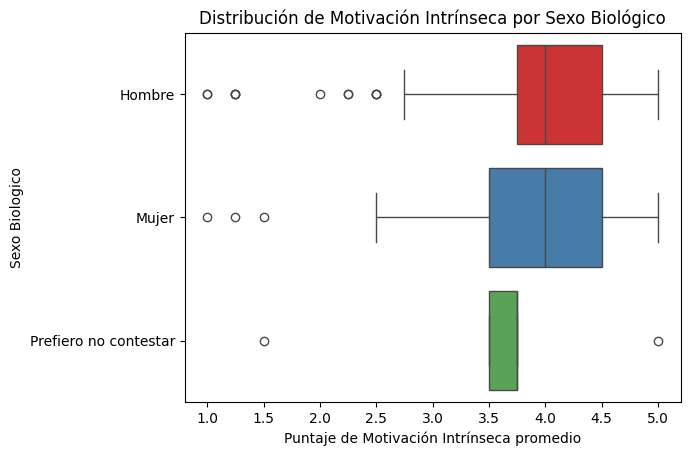

In [16]:
# 'motivacion_intrinseca_3' 
sns.boxplot(data=df_grafica3, x='media_motivacion_intrinseca', y='SEXO', palette='Set1')
plt.title('Distribución de Motivación Intrínseca por Sexo Biológico')
plt.xlabel('Puntaje de Motivación Intrínseca promedio')
plt.ylabel('Sexo Biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\2153455012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_motivacion_extrinseca', y='SEXO', palette='Set1')


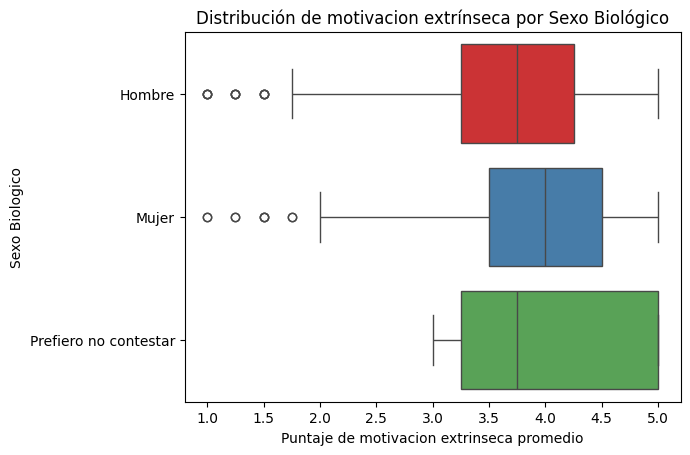

In [17]:
# 'motivacion_extrinseca_4' 
sns.boxplot(data=df_grafica3, x='media_motivacion_extrinseca', y='SEXO', palette='Set1')
plt.title('Distribución de motivacion extrínseca por Sexo Biológico')
plt.xlabel('Puntaje de motivacion extrinseca promedio')
plt.ylabel('Sexo Biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1042325170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_pertenencia_programa', y='SEXO', palette='Set1')


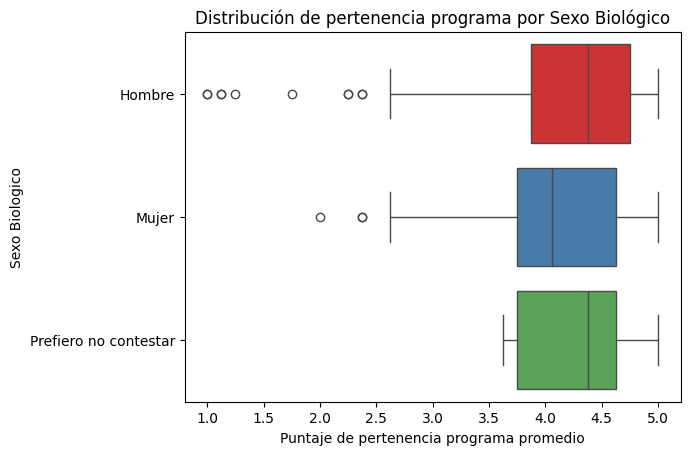

In [18]:
# 'pertenencia_programa_5' 
sns.boxplot(data=df_grafica3, x='media_pertenencia_programa', y='SEXO', palette='Set1')
plt.title('Distribución de pertenencia programa por Sexo Biológico')
plt.xlabel('Puntaje de pertenencia programa promedio')
plt.ylabel('Sexo Biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\3315674736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_pertenencia_stem', y='SEXO', palette='Set1')


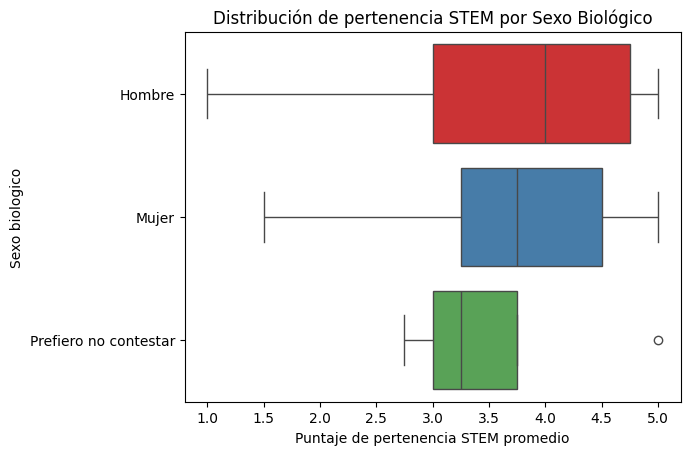

In [19]:
# 'pertenencia_stem_6' 
sns.boxplot(data=df_grafica3, x='media_pertenencia_stem', y='SEXO', palette='Set1')
plt.title('Distribución de pertenencia STEM por Sexo Biológico')
plt.xlabel('Puntaje de pertenencia STEM promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\221956401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_compromiso_academico', y='SEXO', palette='Set1')


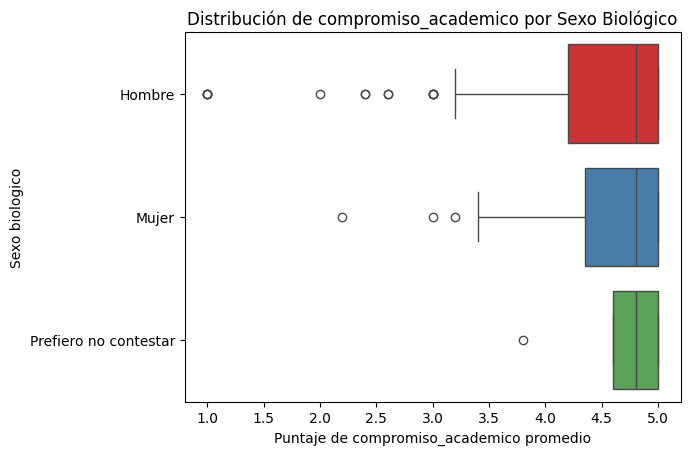

In [20]:
# 'compromiso_academico_7' 
sns.boxplot(data=df_grafica3, x='media_compromiso_academico', y='SEXO', palette='Set1')
plt.title('Distribución de compromiso_academico por Sexo Biológico')
plt.xlabel('Puntaje de compromiso_academico promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\4151709443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_expec_empleo', y='SEXO', palette='Set1')


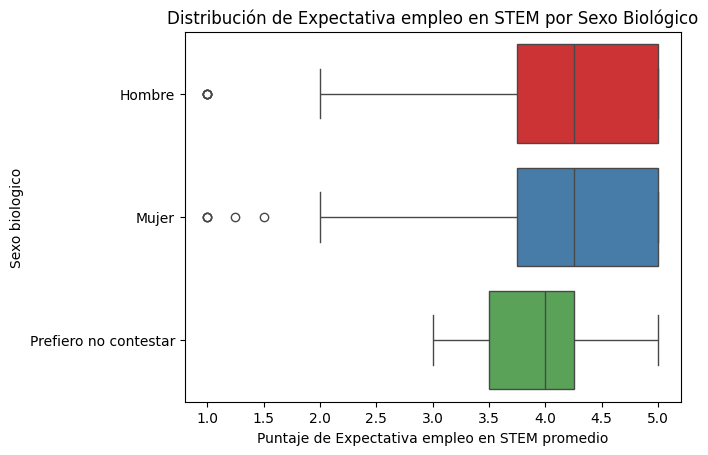

In [21]:
# 'expec_empleo_8' 
sns.boxplot(data=df_grafica3, x='media_expec_empleo', y='SEXO', palette='Set1')
plt.title('Distribución de Expectativa empleo en STEM por Sexo Biológico')
plt.xlabel('Puntaje de Expectativa empleo en STEM promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1437667032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_expec_valor_exit', y='SEXO', palette='Set1')


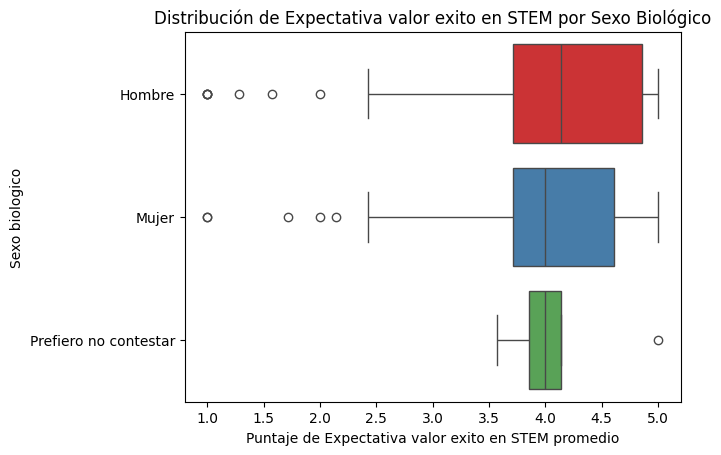

In [22]:
# 'expec_valor_exit_9' 
sns.boxplot(data=df_grafica3, x='media_expec_valor_exit', y='SEXO', palette='Set1')
plt.title('Distribución de Expectativa valor exito en STEM por Sexo Biológico')
plt.xlabel('Puntaje de Expectativa valor exito en STEM promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\3585259432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_expec_val_percibido', y='SEXO', palette='Set1')


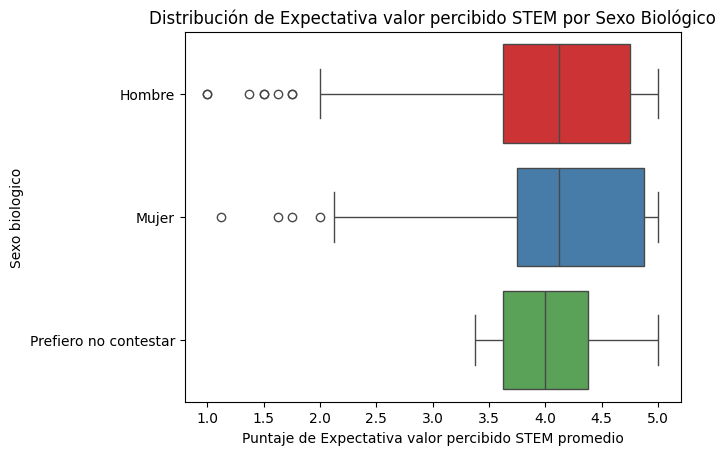

In [23]:
# 'expec_val_percibido_10' 
sns.boxplot(data=df_grafica3, x='media_expec_val_percibido', y='SEXO', palette='Set1')
plt.title('Distribución de Expectativa valor percibido STEM por Sexo Biológico')
plt.xlabel('Puntaje de Expectativa valor percibido STEM promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\2778941386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_abandona', y='SEXO', palette='Set1')


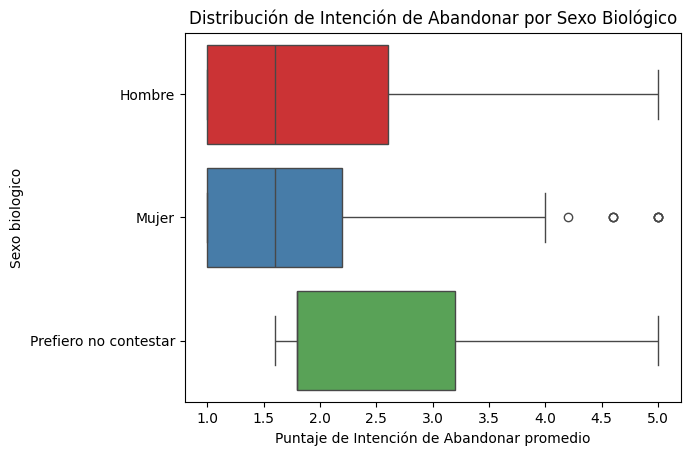

In [24]:
# 'Intención de Abandonar_11' 
sns.boxplot(data=df_grafica3, x='media_abandona', y='SEXO', palette='Set1')
plt.title('Distribución de Intención de Abandonar por Sexo Biológico')
plt.xlabel('Puntaje de Intención de Abandonar promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\2079602198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_compatibilidad_genpro', y='SEXO', palette='Set1')


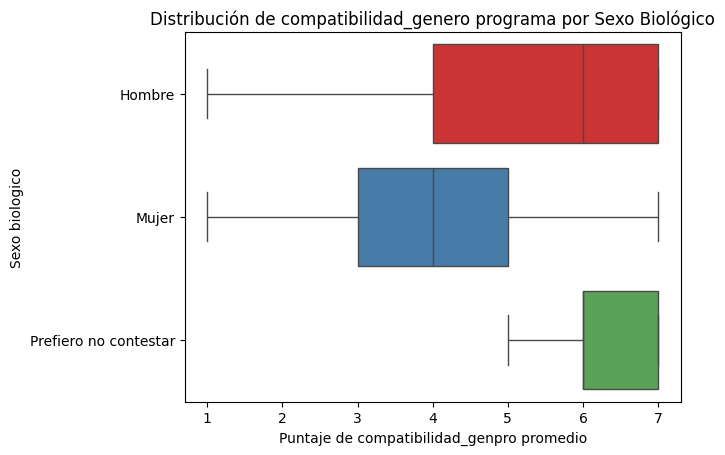

In [25]:
# 'compatibilidad_genpro_12' 
sns.boxplot(data=df_grafica3, x='media_compatibilidad_genpro', y='SEXO', palette='Set1')
plt.title('Distribución de compatibilidad_genero programa por Sexo Biológico')
plt.xlabel('Puntaje de compatibilidad_genpro promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\2077398753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_compatibilidad_estste', y='SEXO', palette='Set1')


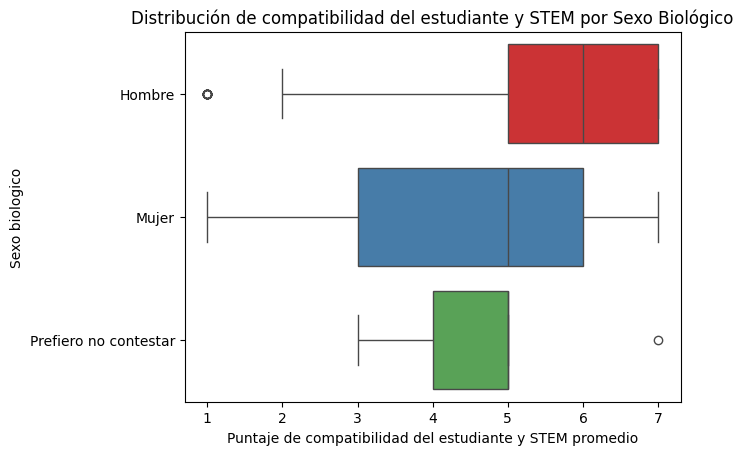

In [26]:
# 'compatibilidad_estste_13' 
sns.boxplot(data=df_grafica3, x='media_compatibilidad_estste', y='SEXO', palette='Set1')
plt.title('Distribución de compatibilidad del estudiante y STEM por Sexo Biológico')
plt.xlabel('Puntaje de compatibilidad del estudiante y STEM promedio')
plt.ylabel('Sexo biologico')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\4262974514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grafica3, x='media_compatibilidad_genste', y='SEXO', palette='Set1')


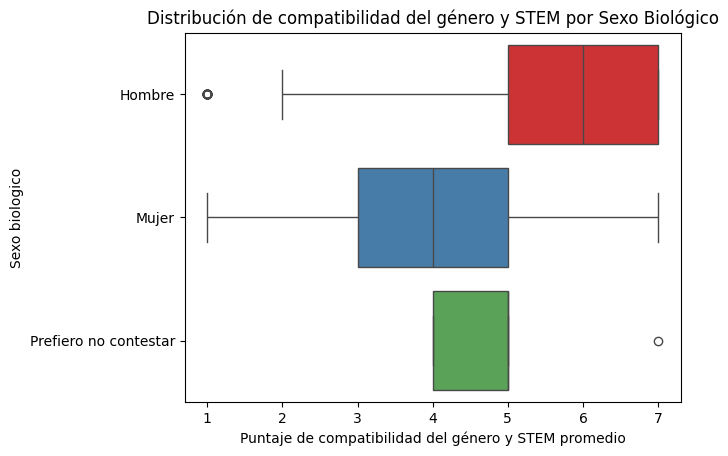

In [27]:
# 'compatibilidad_genste_14' 
sns.boxplot(data=df_grafica3, x='media_compatibilidad_genste', y='SEXO', palette='Set1')
plt.title('Distribución de compatibilidad del género y STEM por Sexo Biológico')
plt.xlabel('Puntaje de compatibilidad del género y STEM promedio')
plt.ylabel('Sexo biologico')
plt.show()